# SMS Spam Classifier

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Load data

In [2]:
df = pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.shape

(5572, 2)

### Data Pre-processing

##### Check null values

In [4]:
df.isna().sum()

Category    0
Message     0
dtype: int64

##### Check duplicate values

In [5]:
df.duplicated().sum()

415

- There are 415 duplicate rows
- So drop them from dataframe

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(5157, 2)

- All duplicate rows are dropped from dataset.
- Now 5157 rows are there.

##### Encode the "Category" column

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

- 0: ham and 1: spam

In [9]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['Category'] = label_encode.fit_transform(df['Category'])

C:\Users\ATIQMA~1\AppData\Local\Temp/ipykernel_18296/3034204249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = label_encode.fit_transform(df['Category'])


### Exploratory Data Analysis

In [11]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

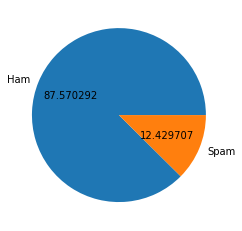

In [13]:
plt.pie(df['Category'].value_counts(), autopct='%f', labels=['Ham','Spam'])
plt.show()

- Data is Imbalanced

##### Create the following new columns for better analysis


- Number of characters.
- Number of words.
- Number of sentences.

In [14]:
!pip install nltk


In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\ATIQ
[nltk_data]     MANSOORI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
df['Characters']=df['Message'].apply(len)

C:\Users\ATIQMA~1\AppData\Local\Temp/ipykernel_18296/1334840836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Characters']=df['Message'].apply(len)


In [20]:
df.head()

,Category,Message,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['Words']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\ATIQMA~1\AppData\Local\Temp/ipykernel_18296/1670416118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Words']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [27]:
df.head()

,Category,Message,Characters,Words,Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,9
1,0,Ok lar... Joking wif u oni...,29,8,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df['Sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\ATIQMA~1\AppData\Local\Temp/ipykernel_18296/1667644061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [29]:
df.head()

,Category,Message,Characters,Words,Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['Characters','Words', 'Sentences']].describe()

,Characters,Words,Sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560016,1.965290
std,58.382922,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Ham
df[df['Category'] == 0][['Characters','Words', 'Sentences']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Characters,4516.0,70.869353,56.708301,2.0,34.0,53.0,91.0,910.0
Words,4516.0,17.267272,13.585433,1.0,8.0,13.0,22.0,220.0
Sentences,4516.0,1.822852,1.374848,1.0,1.0,1.0,2.0,38.0


In [32]:
# Spam
df[df['Category'] == 1][['Characters','Words', 'Sentences']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Characters,641.0,137.118565,30.399707,7.0,130.0,148.0,157.0,223.0
Words,641.0,27.667707,7.103501,2.0,25.0,29.0,32.0,46.0
Sentences,641.0,2.968799,1.486069,1.0,2.0,3.0,4.0,9.0


In [36]:
import seaborn as sb


### Text Pre-processing

- Lower case
- Tokenization
- Remove special characters
- Remove Punctuation and stop words
- Stemming

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ATIQ
[nltk_data]     MANSOORI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:

from nltk.corpus import stopwords
stopwords.words('english')


import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
def transform_text(message):
    message= message.lower()
    message = message.split(' ')
    text=[]
    for i in message:
        if i.isalnum():
            text.append(i)
    
    message=text[:]
    text.clear()
    
    for i in message:
        if i not in string.punctuation and i not in stopwords.words("english"):
            text.append(i)
            
    message=text[:]
    text.clear()
    
    for i in message:
        text.append(ps.stem(i))
        
    return " ".join(text)

In [44]:
df['Transformed_Message'] = df['Message'].apply(transform_text) 

C:\Users\ATIQMA~1\AppData\Local\Temp/ipykernel_18296/4235145050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_Message'] = df['Message'].apply(transform_text)


In [45]:
df.head()

,Category,Message,Characters,Words,Sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though


In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud

### Model Training

In [101]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer()

In [102]:
X = tfidf.fit_transform(df['Transformed_Message']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [103]:
X.shape

(5157, 5685)

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [105]:
X.shape

(5157, 5685)

In [106]:
y = df['Category'].values

In [107]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Predictions and metrics

In [110]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [111]:
models = [gnb, mnb, bnb]
for model in models:
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_test)
    print(f"{model} metrics are :")
    print(accuracy_score(y_pred1, y_test))
    print(precision_score(y_pred1, y_test))
    print(confusion_matrix(y_pred1, y_test))
    print("-"*100)

GaussianNB() metrics are :
0.7897286821705426
0.8897058823529411
[[694  15]
 [202 121]]
----------------------------------------------------------------------------------------------------
MultinomialNB() metrics are :
0.9680232558139535
0.8897058823529411
[[878  15]
 [ 18 121]]
----------------------------------------------------------------------------------------------------
BernoulliNB() metrics are :
0.9670542635658915
0.8088235294117647
[[888  26]
 [  8 110]]
----------------------------------------------------------------------------------------------------


### Export pickle file

In [112]:
import pickle

pickle.dump(tfidf,open("vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl",'wb'))